In [72]:
%matplotlib inline

In [110]:
import os
import pandas as pd
import openpyxl
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.cbook as cbook
from statsmodels.iolib.summary2 import summary_col

# Set directory path to current directory
dir_path = os.path.abspath('')
gdp_path = os.path.abspath('../control-variables')

dat = os.path.join(dir_path, 'results_v1.xlsx')
gdp = os.path.join(gdp_path, 'inde-variable-data.xlsx')

In [74]:
# Import GDP data into dataframe and flatten the data
gdp_df = pd.read_excel(gdp, index_col=0, sheet_name="GDP_flat")

gdp_df.index = pd.Series(gdp_df.index).fillna(method='ffill')

# Sort the dataframe by country names
gdp_df = gdp_df.sort_values(["Country Name", "year"], ascending=True)

# Fill the empty cells with 0s
_ = gdp_df.fillna(0, inplace=True)

In [83]:
# with pd.ExcelWriter(gdp,
#                     engine='openpyxl',
#                     mode='a',
#                     if_sheeet_exists="overlay",
# ) as writer:
#     writer.book = openpyxl.load_workbook(gdp)
#     gdp_df.to_excel(writer, sheet_name='GDP_1')

In [106]:
df = pd.read_excel(dat, index_col=0, sheet_name="full_data")
df.index = pd.Series(df.index).fillna(method='ffill')

print(df.tail())

          year  Energy Policy  Energy distribution  \
country                                              
Zimbabwe  2015          54994                    0   
Zimbabwe  2016          10522                    0   
Zimbabwe  2017          23703                    0   
Zimbabwe  2018           2351                    0   
Zimbabwe  2019         485782                    0   

          Energy generation, non-renewable sources  \
country                                              
Zimbabwe                                      7089   
Zimbabwe                                     46362   
Zimbabwe                                         0   
Zimbabwe                                         0   
Zimbabwe                                         0   

          Energy generation, renewable sources  elec_rate  GDP  
country                                                         
Zimbabwe                                158293  33.700000  NaN  
Zimbabwe                                 26483 

In [111]:
# for name, group in df.groupby('country'):
#     # print(name)
    
#     y=group['elec_rate']

#     # Model 1: The multiple regression model describes the response as a weighted sum of the predictors:(Elec = beta_0 + beta_1*ED + beta_2*EG,nr ~)
#     X0 = group[['Energy distribution',
#                 'Energy generation, non-renewable sources',
#                 'Energy Policy',
#                 'Energy generation, renewable sources',
#                 'GDP'                  
#                 ]]
    
#     X0 = sm.add_constant(X0)
    
#     reg0 = sm.OLS(y, X0).fit()
    
#     results = summary_col([reg0],stars=True,float_format='%0.8f',
#                        model_names=['Model 1'],
#                        info_dict={'N':lambda x: "{0:d}".format(int(x.nobs)),
#                                   'R2':lambda x: "{:.2f}".format(x.rsquared)})

#     print(results) 


                                           Model 1   
-----------------------------------------------------
const                                    15.25318858 
                                         (8.87953829)
Energy distribution                      0.00000376  
                                         (0.00000212)
Energy generation, non-renewable sources -0.00001302 
                                         (0.00000955)
Energy Policy                            -0.00000031 
                                         (0.00000119)
Energy generation, renewable sources     -0.00000033 
                                         (0.00000041)
GDP                                      0.00333921**
                                         (0.00133573)
R-squared                                0.72207248  
R-squared Adj.                           0.60626935  
N                                        18          
R2                                       0.72        
Standard errors in parenthe

MissingDataError: exog contains inf or nans

In [105]:
df['country'] = pd.Categorical(df['country'], categories=df['country'].unique())

KeyError: 'country'

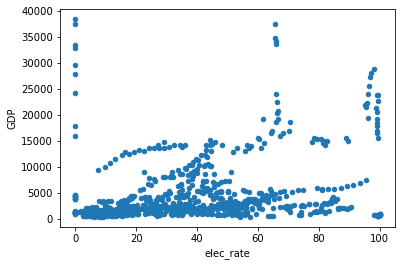

In [104]:
# for country, group in df.groupby('country'):
#     fig = group.plot.scatter(y = 'GDP', x = 'elec_rate', title=country)
    # fig.figure.savefig(dir_path + str(country))


fid = df.plot.scatter(y = 'GDP', x = 'elec_rate')

# # Draw Stripplot
# fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
# sns.stripplot(df.GDP, df.elec_rate, jitter=0.25, size=8, ax=ax, linewidth=.5)

# # Decorations
# plt.title('Use jittered plots to avoid overlapping of points', fontsize=22)
# plt.show()

In [52]:
# with pd.ExcelWriter(gdp,
#                     engine='openpyxl',
#                     mode='a',
#                     if_sheeet_exists="overlay",
# ) as writer:
#     writer.book = openpyxl.load_workbook(gdp)
#     gdp_df.to_excel(writer, sheet_name='GDP_flat')